## Final Project Submission

Please fill out:
* Student name: Monica Haderthauer
* Student pace:  full time
* Scheduled project review date/time: Friday, 3/11
* Instructor name: 
* Blog post URL:


In [224]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 
import seaborn as sns

In [140]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [141]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [142]:
bom_df['title'].value_counts().head()

Bluebeard                                   2
Jeepers Creepers 3                          1
Better Watch Out                            1
We Steal Secrets: The Story of Wikileaks    1
P.K.                                        1
Name: title, dtype: int64

In [143]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


<h1> Merge Box Office Mojo and sql movie basics <h1>

In [144]:


pd.read_sql("""
SELECT *
  FROM 'movie_basics';
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [145]:
sql_basics = pd.read_sql("""
SELECT *
  FROM 'movie_basics';
""", conn)

In [146]:
sql_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [147]:
#sql_basics['title'].value_counts().head()

In [148]:
sql_basics['primary_title'].rename('title', inplace = True)
#avg.rename(columns = {1:"mean"}, inplace=True)

0                                           Sunghursh
1                     One Day Before the Rainy Season
2                          The Other Side of the Wind
3                                     Sabse Bada Sukh
4                            The Wandering Soap Opera
                             ...                     
146139                            Kuambil Lagi Hatiku
146140    Rodolpho Teóphilo - O Legado de um Pioneiro
146141                                Dankyavar Danka
146142                                         6 Gunn
146143                 Chico Albuquerque - Revelações
Name: title, Length: 146144, dtype: object

In [149]:
sql_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [150]:
#bom_df- title
#sql_basics- primary_title


titles = pd.merge(sql_basics, bom_df, how = 'inner', left_on='primary_title', right_on='title')

In [151]:
titles.head(30)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000,2012
5,tt5389486,On the Road,On the Road,2015,39.0,Documentary,On the Road,IFC,744000.0,8000000,2012
6,tt5647250,On the Road,On the Road,2016,121.0,Drama,On the Road,IFC,744000.0,8000000,2012
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
8,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
9,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015


In [152]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3366 entries, 0 to 3365
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3366 non-null   object 
 1   primary_title    3366 non-null   object 
 2   original_title   3366 non-null   object 
 3   start_year       3366 non-null   int64  
 4   runtime_minutes  3198 non-null   float64
 5   genres           3326 non-null   object 
 6   title            3366 non-null   object 
 7   studio           3363 non-null   object 
 8   domestic_gross   3342 non-null   float64
 9   foreign_gross    2043 non-null   object 
 10  year             3366 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 315.6+ KB


In [153]:
titles['primary_title'].value_counts().head(50)

Gone                   15
The Journey            11
The Wall               10
The Other Side         10
Eden                    9
Anna                    8
Inside Out              8
Joy                     8
Sisters                 7
Paranoia                7
The Hunt                7
Mama                    7
Aurora                  7
Unstoppable             7
Unfinished Business     7
Jackpot                 7
Last Night              6
One Day                 6
Gold                    6
The Guardians           6
Truth or Dare           6
The Silence             6
Upside Down             6
Split                   6
Tag                     6
The House               6
On the Road             6
Blood Ties              5
Mountain                5
The Void                5
Robin Hood              5
Abduction               5
We Are Family           5
The Way                 5
Flowers                 5
Red                     5
Inferno                 5
Joker                   5
Intruders   

In [154]:
sql_basics.rename(columns = {'primary_title':'title'}, inplace = True)

titles_2 = pd.merge(sql_basics, bom_df, how = 'left', on='title')

In [155]:
sql_basics.head()  ########

,movie_id,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [156]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [157]:
titles_2.loc[titles_2['title'] == 'Inception']

,movie_id,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",WB,292600000.0,535700000,2010.0


In [158]:
titles_2['domestic_gross'].isna().sum()

142804

In [159]:
titles_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146146 entries, 0 to 146145
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146146 non-null  object 
 1   title            146146 non-null  object 
 2   original_title   146125 non-null  object 
 3   start_year       146146 non-null  int64  
 4   runtime_minutes  114407 non-null  float64
 5   genres           140738 non-null  object 
 6   studio           3363 non-null    object 
 7   domestic_gross   3342 non-null    float64
 8   foreign_gross    2043 non-null    object 
 9   year             3366 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 12.3+ MB


In [160]:
titles_2.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN


In [161]:
titles_2.dropna(subset = ['domestic_gross'], inplace = True)

In [162]:
titles_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 38 to 146080
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3342 non-null   object 
 1   title            3342 non-null   object 
 2   original_title   3342 non-null   object 
 3   start_year       3342 non-null   int64  
 4   runtime_minutes  3175 non-null   float64
 5   genres           3302 non-null   object 
 6   studio           3341 non-null   object 
 7   domestic_gross   3342 non-null   float64
 8   foreign_gross    2019 non-null   object 
 9   year             3342 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 287.2+ KB


In [163]:
titles_2['genres'].unique()

array(['Action,Crime,Drama', 'Adventure,Drama,Romance',
       'Adventure,Comedy,Drama', 'Action,Adventure,Sci-Fi',
       'Comedy,Drama', 'Crime,Drama', 'Comedy,Family',
       'Adventure,Animation,Comedy', 'Drama', 'Crime,Drama,Thriller',
       'Action,Sci-Fi,Thriller', 'Drama,Mystery,Sci-Fi',
       'Biography,Drama,History', 'Comedy', 'Action,Adventure,Thriller',
       'Horror,Mystery,Thriller', 'Action,Drama,Family',
       'Drama,Romance,Sci-Fi', 'Comedy,Drama,Romance',
       'Action,Comedy,Fantasy', 'Action,Adventure,Animation',
       'Action,Adventure,Fantasy', 'Adventure,Drama,Fantasy',
       'Horror,Thriller', 'Action,Crime,Thriller',
       'Adventure,Comedy,Western', 'Drama,Horror,Sci-Fi', 'Comedy,Horror',
       'Action,Comedy,Crime', 'Comedy,Drama,Music', 'Action,Thriller',
       'Adventure,Drama,Mystery', 'Drama,Fantasy',
       'Action,Adventure,Comedy', 'Action,Adventure,Crime',
       'Comedy,Romance', 'Action,Adventure,Drama', 'Comedy,Crime,Drama',
       'Dram

In [164]:
titles_2.isna().sum()



#titles.drop_duplicates('primary_title', inplace = True)

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes     167
genres               40
studio                1
domestic_gross        0
foreign_gross      1323
year                  0
dtype: int64

In [165]:
#split genres
#first dropnas from genres
titles_2.dropna(subset = ['genres'], inplace = True)
#df.assign(var1=df.var1.str.split(",")).explode("var1")

In [166]:

titles_3 = titles_2.assign(genres=titles_2.genres.str.split(",")).explode("genres")

In [167]:
#group by genres
titles_3.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
38,tt0315642,Wazir,Wazir,2016,103.0,Action,Relbig.,1100000.0,NaN,2016.0
38,tt0315642,Wazir,Wazir,2016,103.0,Crime,Relbig.,1100000.0,NaN,2016.0
38,tt0315642,Wazir,Wazir,2016,103.0,Drama,Relbig.,1100000.0,NaN,2016.0
48,tt0337692,On the Road,On the Road,2012,124.0,Adventure,IFC,744000.0,8000000,2012.0
48,tt0337692,On the Road,On the Road,2012,124.0,Drama,IFC,744000.0,8000000,2012.0


In [168]:
titles_3['genres'].unique()

array(['Action', 'Crime', 'Drama', 'Adventure', 'Romance', 'Comedy',
       'Sci-Fi', 'Family', 'Animation', 'Thriller', 'Mystery',
       'Biography', 'History', 'Horror', 'Fantasy', 'Western', 'Music',
       'Documentary', 'War', 'Sport', 'Musical', 'News'], dtype=object)

In [169]:
#drop foreign_gross because there are many missing values 
titles_3.drop(columns = 'foreign_gross', inplace = True)

In [170]:
titles_3.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,year
38,tt0315642,Wazir,Wazir,2016,103.0,Action,Relbig.,1100000.0,2016.0
38,tt0315642,Wazir,Wazir,2016,103.0,Crime,Relbig.,1100000.0,2016.0
38,tt0315642,Wazir,Wazir,2016,103.0,Drama,Relbig.,1100000.0,2016.0
48,tt0337692,On the Road,On the Road,2012,124.0,Adventure,IFC,744000.0,2012.0
48,tt0337692,On the Road,On the Road,2012,124.0,Drama,IFC,744000.0,2012.0


In [171]:
titles_3.isna().sum()

movie_id             0
title                0
original_title       0
start_year           0
runtime_minutes    181
genres               0
studio               3
domestic_gross       0
year                 0
dtype: int64

In [172]:
#deciding to drop nan from studio because it's all one movie
titles_3[titles_3['studio'].isna()]

,movie_id,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,year
45234,tt2679680,Plot for Peace,Plot for Peace,2013,84.0,Documentary,NaN,7100.0,2014.0
45234,tt2679680,Plot for Peace,Plot for Peace,2013,84.0,History,NaN,7100.0,2014.0
45234,tt2679680,Plot for Peace,Plot for Peace,2013,84.0,Thriller,NaN,7100.0,2014.0


## Dropna rows

In [173]:
#drop studio nans 
titles_3.dropna(subset = ['studio'], inplace = True)

In [174]:
titles_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 38 to 146080
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         7376 non-null   object 
 1   title            7376 non-null   object 
 2   original_title   7376 non-null   object 
 3   start_year       7376 non-null   int64  
 4   runtime_minutes  7195 non-null   float64
 5   genres           7376 non-null   object 
 6   studio           7376 non-null   object 
 7   domestic_gross   7376 non-null   float64
 8   year             7376 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 576.2+ KB


## Top Genre Table

In [227]:
top_genres = titles_3.groupby('genres').mean().sort_values(by = 'domestic_gross', ascending = False)
#df.groupby('name')['activity'].value_counts()

In [230]:
top_genres.head()

,start_year,runtime_minutes,domestic_gross,year
genres,,,,
Sci-Fi,2013.905797,113.492647,1.083885e+08,2014.094203
Adventure,2014.173423,109.693002,9.440941e+07,2014.283784
Animation,2014.205128,94.818182,8.732619e+07,2014.480769
Action,2014.048632,115.048062,5.841816e+07,2014.088146
Fantasy,2014.005682,110.087719,5.277712e+07,2014.130682


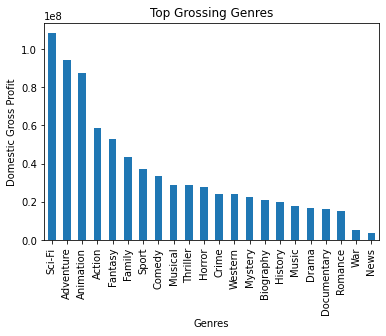

In [239]:
## make mbar chart with top 5 genres
top_genres['domestic_gross'].plot(kind='bar')

plt.title('Top Grossing Genres')
plt.xlabel('Genres')
plt.ylabel('Domestic Gross Profit');

## Runtime Table

In [176]:
titles_3[titles_3['runtime_minutes'].isna()]

,movie_id,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,year
74,tt0402887,Capture the Flag,Capture the Flag,2010,NaN,Drama,Par.,6700.0,2015.0
2302,tt10230604,The Cut,The Cut,2018,NaN,Documentary,Strand,28100.0,2015.0
2563,tt10265116,Dream House,Dream House,2019,NaN,Comedy,Uni.,21300000.0,2011.0
2563,tt10265116,Dream House,Dream House,2019,NaN,Drama,Uni.,21300000.0,2011.0
2563,tt10265116,Dream House,Dream House,2019,NaN,Romance,Uni.,21300000.0,2011.0
...,...,...,...,...,...,...,...,...,...
145298,tt9799088,The Girl on the Train,The Girl on the Train,2018,NaN,Mystery,Strand,208000.0,2010.0
145298,tt9799088,The Girl on the Train,The Girl on the Train,2018,NaN,Thriller,Strand,208000.0,2010.0
145431,tt9816988,Gold,Tala,2019,NaN,Drama,Wein.,7200000.0,2017.0
145666,tt9851050,Sisters,Sisters,2019,NaN,Action,Uni.,87000000.0,2015.0


In [177]:
titles_3['runtime_minutes'].mean()

106.76136205698401

In [178]:
titles_3['runtime_minutes'].median()

105.0

In [179]:
titles_3['runtime_minutes'].mode()

0    100.0
dtype: float64

In [180]:
titles_3['runtime_minutes'].std()

22.896362882111557

In [242]:
titles_3['runtime_minutes'].unique()

array([103., 124., 114., 110., 119., 108.,  92., 100., 132.,  nan, 107.,
       112., 122., 117., 127.,  97., 150.,  95.,  90., 141., 102., 101.,
        96.,  89., 105.,  88., 104.,  93., 116., 106.,  98., 129., 139.,
       125.,  77.,  91., 143., 130.,  86., 115., 123., 131., 169.,  87.,
       121., 133., 136., 109., 140., 126., 120., 113., 111., 180.,  80.,
        11.,  16., 137., 128.,  79., 118., 152.,  75.,  55.,  99.,  84.,
       165.,  81., 134.,  83., 138.,  94., 148., 161., 144., 135.,  78.,
       272., 146.,  82., 163., 155.,  85., 164., 172., 142., 153., 157.,
       147., 154., 181., 145.,  63., 151.,  41., 158.,  50.,  76., 156.,
        69.,  68.,  73.,  49., 174.,  52.,  74.,  71.,  70., 149.,  59.,
        13.,  60.,  45.,  66., 176.,   9., 160.,  26.,  51.,  53.,  27.,
       186.,  44.,  65.,  72., 159.,  40.,  47.,  46.,  58.,  25.,  57.,
       192.,  34., 168.,  56.,  22., 177.,  17., 162.,   5., 170., 184.,
        19.,   6.,   3., 167.,  67., 189.,  62.,  3

Cleaning Data

studio missing values-
domestic_gross- fill with mean or median- median seems more representative, use median or std or drop
foreign_gross- drop  


In [181]:
bom_df['domestic_gross'].isna().sum()

28

In [182]:
#investigating by aggregating the column to find the most approprite measure to replace data with 
bom_df['domestic_gross'].mean()

28745845.06698422

In [183]:
bom_df['domestic_gross'].median()


1400000.0

In [184]:
bom_df['domestic_gross'].mode()

0    1100000.0
dtype: float64

In [185]:
bom_df['domestic_gross'].std()

66982498.23736456

In [186]:
bom_df['foreign_gross'].isna().sum()

1350

In [187]:
#I decided to drop the foreign_gross column because it's not useful for my analysis and has many missing values
bom_df.drop(columns = 'foreign_gross', inplace = True)

In [188]:
bom_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [189]:
bom_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [190]:
bom_df[bom_df['studio'].isna()]

,title,studio,domestic_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,2010
555,Fireflies in the Garden,NaN,70600.0,2011
933,Keith Lemon: The Film,NaN,NaN,2012
1862,Plot for Peace,NaN,7100.0,2014
2825,Secret Superstar,NaN,NaN,2017


In [191]:
bom_df[bom_df['domestic_gross'].isna()]

#replace with median

,title,studio,domestic_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,2010
298,Celine: Through the Eyes of the World,Sony,NaN,2010
302,White Lion,Scre.,NaN,2010
306,Badmaash Company,Yash,NaN,2010
327,Aashayein (Wishes),Relbig.,NaN,2010
537,Force,FoxS,NaN,2011
713,Empire of Silver,NeoC,NaN,2011
871,Solomon Kane,RTWC,NaN,2012
928,The Tall Man,Imag.,NaN,2012
933,Keith Lemon: The Film,NaN,NaN,2012


<AxesSubplot:ylabel='Frequency'>

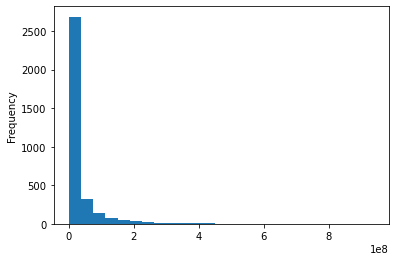

In [244]:
bom_df['domestic_gross'].plot.hist(bins=25)

In [193]:
bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median(), inplace = True)

In [194]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


<AxesSubplot:ylabel='Frequency'>

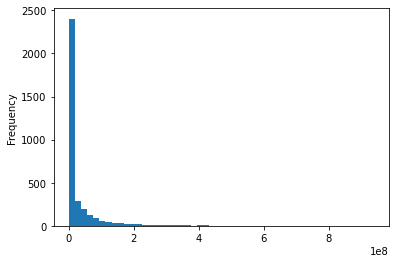

In [195]:
bom_df['domestic_gross'].plot.hist(bins=50)
#histogram shape remains similar

In [196]:
bom_df[bom_df['studio'].isna()]

# is this a problem? replacing with median replaced with much higher values 1.4M vs under 1M

,title,studio,domestic_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,2010
555,Fireflies in the Garden,NaN,70600.0,2011
933,Keith Lemon: The Film,NaN,1400000.0,2012
1862,Plot for Peace,NaN,7100.0,2014
2825,Secret Superstar,NaN,1400000.0,2017


In [197]:
bom_df.sort_values(by='domestic_gross', ascending=False).head(20)

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,2017
3082,Incredibles 2,BV,608600000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,2017
2324,Finding Dory,BV,486300000.0,2016


<h1>SQLite<h1>


Note which tables I decide to use and merge- why.


put .head of each 

In [198]:
pd.read_sql("""
SELECT *
  FROM 'persons';
""", conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [199]:
#use principals and persons tables instead of 3 knownfor directors and writers tables. 
#category has director/ writer info and I can sort
#check null values of each

#below I checked the category values and the director table values to find the most robust dataset 
pd.read_sql("""
SELECT *
  FROM principals;
""", conn).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [200]:
pd.read_sql("""
SELECT *
  FROM principals;
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [201]:
pd.read_sql("""
SELECT *
  FROM principals
  WHERE category == 'director'
  ;
""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,2,nm0398271,director,None,None
1,tt0323808,5,nm0362736,director,None,None
2,tt0417610,5,nm1145057,director,None,None
3,tt0469152,5,nm0707738,director,None,None
4,tt0473032,3,nm0776090,director,None,None
...,...,...,...,...,...,...
146388,tt9679036,5,nm9728620,director,None,None
146389,tt9681728,5,nm10436661,director,None,None
146390,tt9689618,4,nm9652770,director,None,None
146391,tt9689618,5,nm10439725,director,None,None


In [202]:
pd.read_sql("""
SELECT *
  FROM directors;
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [203]:
pd.read_sql("""
SELECT *
  FROM principals
  WHERE category == 'director'
  ;
""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,2,nm0398271,director,None,None
1,tt0323808,5,nm0362736,director,None,None
2,tt0417610,5,nm1145057,director,None,None
3,tt0469152,5,nm0707738,director,None,None
4,tt0473032,3,nm0776090,director,None,None
...,...,...,...,...,...,...
146388,tt9679036,5,nm9728620,director,None,None
146389,tt9681728,5,nm10436661,director,None,None
146390,tt9689618,4,nm9652770,director,None,None
146391,tt9689618,5,nm10439725,director,None,None


In [204]:
pd.read_sql("""
SELECT *
  FROM principals
  WHERE category == 'actor' OR 'actress'
  ;
""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
2,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
3,tt0417610,1,nm0532721,actor,None,"[""Lucio""]"
4,tt0417610,3,nm0069209,actor,None,"[""Dr. Samaniego""]"
...,...,...,...,...,...,...
256713,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]"
256714,tt9689618,1,nm10439726,actor,None,None
256715,tt9689618,2,nm10439727,actor,None,None
256716,tt9689618,3,nm10439724,actor,None,None


In [205]:
directors_ratings = pd.read_sql("""
SELECT *
  FROM persons
  INNER JOIN directors 
  USING (person_id)
  INNER JOIN movie_ratings
  USING (movie_id)
""", conn)

## directors merge table

In [117]:
directors_ratings.head(20)

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,averagerating,numvotes
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,6.4,77
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,6.4,77
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,6.4,77
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,6.4,77
4,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445,6.4,256
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445,6.4,256
6,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445,6.4,256
7,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2590280,5.8,158
8,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt8421806,7.9,54
9,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt8421806,7.9,54


In [207]:
directors_ratings['numvotes'].mean()

4955.5243925970435

In [208]:
directors_ratings['numvotes'].median()

66.0

In [209]:
directors_ratings['numvotes'].mode()

0    6
dtype: int64

In [210]:
directors_ratings['numvotes'].std()

37609.309907877105

In [211]:
directors_ratings_1 = directors_ratings.loc[directors_ratings['numvotes'] > 1000]

In [212]:
directors_ratings_1.head()

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,averagerating,numvotes
13,nm0070482,Joel Bender,1948.0,NaN,"editor,director,writer",tt1016090,5.9,1878
14,nm0075666,Joe Berlinger,1961.0,NaN,"producer,director,camera_department",tt2028530,8.1,8337
16,nm0075666,Joe Berlinger,1961.0,NaN,"producer,director,camera_department",tt2481498,6.7,38459
17,nm0075666,Joe Berlinger,1961.0,NaN,"producer,director,camera_department",tt2481498,6.7,38459
19,nm0075666,Joe Berlinger,1961.0,NaN,"producer,director,camera_department",tt3326366,6.8,2741


In [213]:
directors_ratings_1.drop_duplicates(subset = ['movie_id']).groupby('primary_name').count()

,person_id,birth_year,death_year,primary_profession,movie_id,averagerating,numvotes
primary_name,,,,,,,
A. Karunakaran,1,0,0,1,1,1,1
A. Taner Elhan,1,1,0,1,1,1,1
A. Todd Smith,1,0,0,1,1,1,1
A.G. Amid,1,0,0,1,1,1,1
A.J. Edwards,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...
Ömer Faruk Sorak,3,0,0,3,3,3,3
Ömer Vargi,1,0,0,1,1,1,1
Özcan Deniz,5,5,0,5,5,5,5


In [216]:
directors_ratings_1.drop_duplicates(subset = ['movie_id']).sort_values('averagerating', ascending = False).head(20)





,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,averagerating,numvotes
12344,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer",tt7131622,9.7,5600
116002,nm3123304,Nikoloz Khomasuridze,1977.0,NaN,"producer,director,writer",tt6058226,9.6,2604
153265,nm6748553,Karzan Kardozi,NaN,NaN,"director,writer,producer",tt4131686,9.6,1339
175753,nm8359417,Chathra Weeraman,NaN,NaN,"special_effects,director",tt5963218,9.5,6509
137762,nm3591496,Ram,NaN,NaN,"director,writer,actor",tt7738784,9.4,9629
77837,nm1823803,Tanel Toom,1982.0,NaN,"director,writer,assistant_director",tt5593384,9.3,1220
60861,nm1919905,Donavon Warren,NaN,NaN,"producer,actor,director",tt2170667,9.3,17308
117844,nm3809021,Alper Caglar,NaN,NaN,"producer,writer,editor",tt5813916,9.3,100568
123075,nm2755490,Amitabh Reza Chowdhury,NaN,NaN,"miscellaneous,director,actor",tt5354160,9.3,18470
78007,nm2339782,Murat Dündar,NaN,NaN,"assistant_director,director",tt2592910,9.2,41560


In [219]:
#sorted by number of votes, then sorted by average rating. This has eliminated my problem of top directors 
#that have only made 1 movie vs directors that are very well known
directors_ratings_1.sort_values(['numvotes', 'averagerating'], ascending = (False, False)).head(20)

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,averagerating,numvotes
4242,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1375666,8.8,1841066
4238,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1345836,8.4,1387769
4239,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1345836,8.4,1387769
4240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1345836,8.4,1387769
4241,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1345836,8.4,1387769
4236,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt0816692,8.6,1299334
4237,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt0816692,8.6,1299334
12340,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer",tt1853728,8.4,1211405
45273,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director",tt0848228,8.1,1183655
45274,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director",tt0848228,8.1,1183655


In [365]:
# need a visualization
directors_1 = directors_ratings_1.sort_values(['numvotes', 'averagerating'], ascending = (False, False)).head(20)

In [373]:
directors_1.reset_index()

,index,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,averagerating,numvotes
0,4242,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1375666,8.8,1841066
1,4238,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1345836,8.4,1387769
2,4239,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1345836,8.4,1387769
3,4240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1345836,8.4,1387769
4,4241,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt1345836,8.4,1387769
5,4236,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt0816692,8.6,1299334
6,4237,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",tt0816692,8.6,1299334
7,12340,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer",tt1853728,8.4,1211405
8,45273,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director",tt0848228,8.1,1183655
9,45274,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director",tt0848228,8.1,1183655


In [376]:
directors_1.drop_duplicates('primary_name', inplace = True)

In [377]:
directors_1.set_index('primary_name')

,person_id,birth_year,death_year,primary_profession,movie_id,averagerating,numvotes
primary_name,,,,,,,
Christopher Nolan,nm0634240,1970.0,NaN,"writer,producer,director",tt1375666,8.8,1841066
Quentin Tarantino,nm0000233,1963.0,NaN,"writer,actor,producer",tt1853728,8.4,1211405
Joss Whedon,nm0923736,1964.0,NaN,"writer,producer,director",tt0848228,8.1,1183655
Martin Scorsese,nm0000217,1942.0,NaN,"producer,director,actor",tt0993846,8.2,1035358
James Gunn,nm0348181,1966.0,NaN,"writer,producer,director",tt2015381,8.1,948394


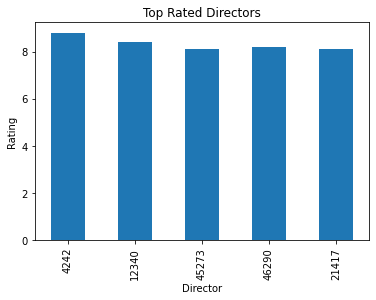

In [378]:
directors_1['averagerating'].plot(kind='bar')

plt.title('Top Rated Directors')
plt.xlabel('Director')
plt.ylabel('Rating');

In [98]:
pd.read_sql("""
SELECT *
  FROM known_for;
""", conn).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [99]:
pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [264]:
pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn).info()

#replace runtime minutes with mean, median, or mode if I end up using it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [102]:
pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [103]:
pd.read_sql("""
SELECT *
  FROM movie_akas;
""", conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [104]:
q = """
SELECT *
FROM movie_ratings
JOIN directors
    USING(movie_id)
;
"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes,person_id
0,tt10356526,8.3,31,nm8353804
1,tt10356526,8.3,31,nm8353804
2,tt10384606,8.9,559,nm9250842
3,tt10384606,8.9,559,nm9932562
4,tt1042974,6.4,20,nm1915232
...,...,...,...,...
181384,tt9844256,7.5,24,nm0849465
181385,tt9844256,7.5,24,nm0849465
181386,tt9851050,4.7,14,nm1272773
181387,tt9886934,7.0,5,nm0001206


In [105]:
q = """
SELECT *
FROM movie_ratings
   INNER JOIN
   directors
   USING (movie_id)
   INNER JOIN
   persons
   USING (person_id)
   ;
"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
1,tt10356526,8.3,31,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
...,...,...,...,...,...,...,...,...
181382,tt9844256,7.5,24,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181383,tt9844256,7.5,24,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


## add graph for directors

## writers merge table

In [249]:
q = """
SELECT *
FROM persons
   ;
"""
pd.read_sql(q, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [316]:
q = """
SELECT *
FROM movie_ratings
JOIN principals
    USING(movie_id)
;
"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes,ordering,person_id,category,job,characters
0,tt10356526,8.3,31,1,nm4718369,actor,None,"[""Sukh""]"
1,tt10356526,8.3,31,2,nm10007357,actress,None,"[""Raunak""]"
2,tt10356526,8.3,31,3,nm8743259,actress,None,"[""Jaanpreet""]"
3,tt10356526,8.3,31,4,nm3760302,actor,None,"[""Garry Randhawa""]"
4,tt10356526,8.3,31,5,nm8353804,director,None,None
...,...,...,...,...,...,...,...,...
629750,tt9894098,6.3,128,6,nm7120982,producer,producer,None
629751,tt9894098,6.3,128,7,nm10166058,composer,None,None
629752,tt9894098,6.3,128,8,nm2518188,cinematographer,None,None
629753,tt9894098,6.3,128,9,nm5481676,editor,None,None


In [317]:
actors = pd.read_sql("""
SELECT *
  FROM persons
  INNER JOIN principals 
  USING (person_id)
  INNER JOIN movie_ratings
  USING (movie_id)
""", conn)

In [318]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629598 entries, 0 to 629597
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           629598 non-null  object 
 1   primary_name        629598 non-null  object 
 2   birth_year          179923 non-null  float64
 3   death_year          8232 non-null    float64
 4   primary_profession  606622 non-null  object 
 5   movie_id            629598 non-null  object 
 6   ordering            629598 non-null  int64  
 7   category            629598 non-null  object 
 8   job                 124945 non-null  object 
 9   characters          248025 non-null  object 
 10  averagerating       629598 non-null  float64
 11  numvotes            629598 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 57.6+ MB


In [319]:
actors.head()

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,ordering,category,job,characters,averagerating,numvotes
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",tt2398241,9,producer,producer,None,6.0,15612
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt0433397,7,composer,None,None,4.7,214
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt1681372,8,composer,None,None,4.0,127
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt2281215,7,composer,None,None,3.6,582
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt2387710,8,composer,None,None,5.4,50


In [320]:
actors.drop(columns = ['birth_year', 'death_year', 'primary_profession'], inplace = True)

In [379]:
actors['primary_name'] = 'Sarah Vowell'

In [322]:
actors.head(10)

,person_id,primary_name,movie_id,ordering,category,job,characters,averagerating,numvotes
0,nm0061671,Mary Ellen Bauder,tt2398241,9,producer,producer,None,6.0,15612
1,nm0061865,Joseph Bauer,tt0433397,7,composer,None,None,4.7,214
2,nm0061865,Joseph Bauer,tt1681372,8,composer,None,None,4.0,127
3,nm0061865,Joseph Bauer,tt2281215,7,composer,None,None,3.6,582
4,nm0061865,Joseph Bauer,tt2387710,8,composer,None,None,5.4,50
5,nm0061865,Joseph Bauer,tt2749258,8,composer,None,None,4.9,56
6,nm0061865,Joseph Bauer,tt3564200,9,composer,None,None,3.6,1388
7,nm0062195,Axel Baumann,tt2547632,10,cinematographer,None,None,7.3,23
8,nm0062195,Axel Baumann,tt7697870,8,cinematographer,None,None,8.7,23
9,nm0062195,Axel Baumann,tt8171864,6,cinematographer,None,None,7.6,14


In [323]:
actors['category'].unique()
#investigate types under catergory

array(['producer', 'composer', 'cinematographer', 'production_designer',
       'director', 'actress', 'writer', 'editor', 'actor', 'self',
       'archive_footage', 'archive_sound'], dtype=object)

In [324]:
actors.loc[actors['category'] == 'actor'].sort_values(['numvotes', 'averagerating'], ascending = (False, False))
#titles_2.loc[titles_2['title'] == 'Inception']
#irectors_ratings_1.sort_values(['numvotes', 'averagerating'], ascending = (False, False)).head(20)

,person_id,primary_name,movie_id,ordering,category,job,characters,averagerating,numvotes
6888,nm0330687,Joseph Gordon-Levitt,tt1375666,2,actor,None,"[""Arthur""]",8.8,1841066
34793,nm0913822,Ken Watanabe,tt1375666,4,actor,None,"[""Saito""]",8.8,1841066
123523,nm0000138,Leonardo DiCaprio,tt1375666,1,actor,None,"[""Cobb""]",8.8,1841066
53850,nm0000288,Christian Bale,tt1345836,1,actor,None,"[""Bruce Wayne""]",8.4,1387769
73458,nm0362766,Tom Hardy,tt1345836,2,actor,None,"[""Bane""]",8.4,1387769
...,...,...,...,...,...,...,...,...,...
484621,nm5318185,Kamarul Azman,tt2447822,7,actor,None,None,1.0,5
526719,nm9853997,Giuseppe di Giorgio,tt8446392,1,actor,None,"[""Ivan Coletta""]",1.0,5
527900,nm5318178,Ajaq,tt2447822,6,actor,None,None,1.0,5
623202,nm9844081,Paula Stein,tt8426154,2,actor,None,None,1.0,5


In [327]:
actors = actors.loc[(actors['category'] == 'actor') | (actors['category'] == 'actress')]
#including actors and actresses in the dataset 

In [328]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248300 entries, 42 to 629596
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   person_id      248300 non-null  object 
 1   primary_name   248300 non-null  object 
 2   movie_id       248300 non-null  object 
 3   ordering       248300 non-null  int64  
 4   category       248300 non-null  object 
 5   job            0 non-null       object 
 6   characters     213140 non-null  object 
 7   averagerating  248300 non-null  float64
 8   numvotes       248300 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 18.9+ MB


In [331]:
actors.sort_values(['numvotes', 'averagerating'], ascending = (False, False)).head(20)

,person_id,primary_name,movie_id,ordering,category,job,characters,averagerating,numvotes
6888,nm0330687,Joseph Gordon-Levitt,tt1375666,2,actor,None,"[""Arthur""]",8.8,1841066
34793,nm0913822,Ken Watanabe,tt1375666,4,actor,None,"[""Saito""]",8.8,1841066
113235,nm0680983,Ellen Page,tt1375666,3,actress,None,"[""Ariadne""]",8.8,1841066
123523,nm0000138,Leonardo DiCaprio,tt1375666,1,actor,None,"[""Cobb""]",8.8,1841066
29276,nm0004266,Anne Hathaway,tt1345836,3,actress,None,"[""Selina""]",8.4,1387769
53850,nm0000288,Christian Bale,tt1345836,1,actor,None,"[""Bruce Wayne""]",8.4,1387769
73458,nm0362766,Tom Hardy,tt1345836,2,actor,None,"[""Bane""]",8.4,1387769
114245,nm0000198,Gary Oldman,tt1345836,4,actor,None,"[""Commissioner Gordon""]",8.4,1387769
29272,nm0004266,Anne Hathaway,tt0816692,2,actress,None,"[""Brand""]",8.6,1299334
181527,nm0000190,Matthew McConaughey,tt0816692,1,actor,None,"[""Cooper""]",8.6,1299334


In [357]:
actors_1 = actors.groupby('primary_name').mean().sort_values(['numvotes', 'averagerating'], ascending = (False, False))
#titles_3.groupby('genres').mean().sort_values(by = 'domestic_gross', ascending = False)

In [360]:
actors_1 = actors_1.head(20)

In [362]:
top_actors = actors.sort_values(['numvotes', 'averagerating'], ascending = (False, False)).head(10)

In [343]:
top_actors.set_index('primary_name', inplace = True)

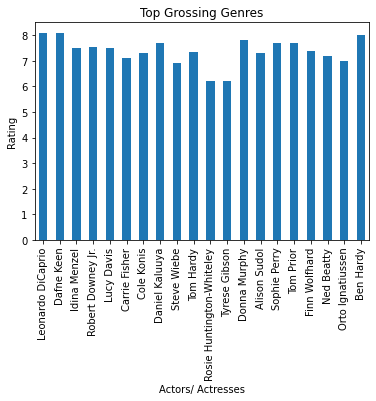

In [364]:
actors_1['averagerating'].plot(kind='bar')

plt.title('Top Grossing Genres')
plt.xlabel('Actors/ Actresses')
plt.ylabel('Rating');

In [ ]:
con.close()